___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# Data Analysis with Python 
# Traffic Police Stops

C:\Users\mkdty\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (8,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


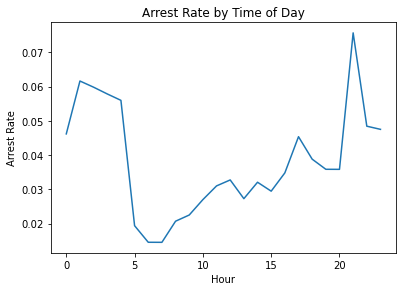

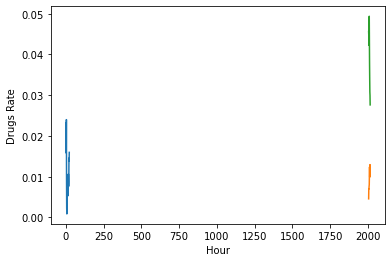

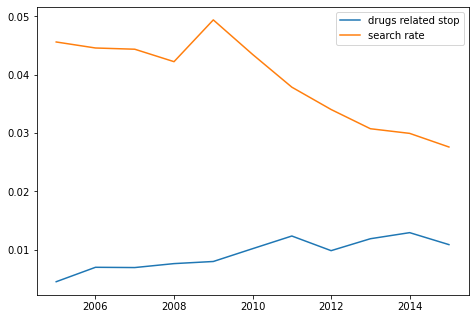

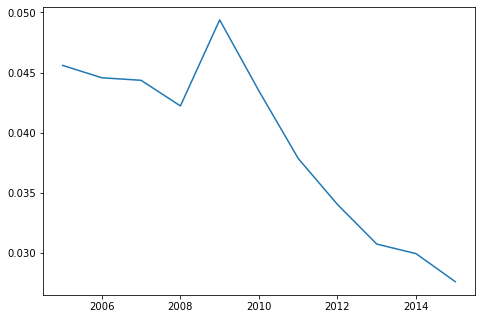

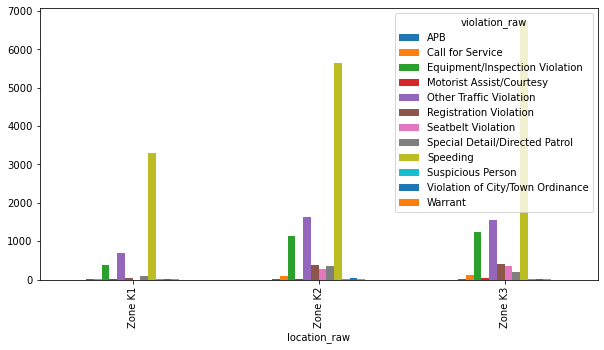

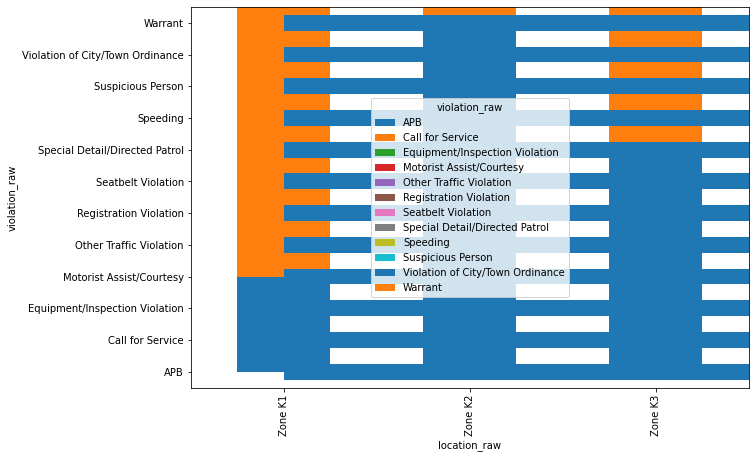

In [7]:
import pandas as pd
df = pd.read_csv("RI_cleaned.csv",skiprows =0).sample(n=50000, random_state = 1)

df.isnull()
df.isnull().sum()
pd.isnull(df["county_fips"])
bool_series = pd.isnull(df["county_fips"])
df[bool_series]
df.drop(["county_name","county_fips" ,"fine_grained_location"],axis=1,inplace=True)
df.shape
df.drop("state",axis=1,inplace=True)
df["driver_gender"].isnull().sum()
df.shape
df.dropna(subset = ["driver_gender"],inplace=True)
df.shape
df[["is_arrested"]].head(10)
df["is_arrested"]=df.is_arrested.astype("bool")
df["is_arrested"].dtype
combined = df.stop_date.str.cat(df.stop_time,sep=" ") #her iki serinin boyu aynı olmalıdır
df["stop_datetime"] = pd.to_datetime(combined)
df["stop_datetime"].dtype
df["stop_datetime"]
df = df.set_index(pd.DatetimeIndex(df["stop_datetime"]))
df.head()
day=pd.Timestamp("2005-01-02")
day.day_name()
df["violation"].value_counts() # Count the unique values in the violation to see what violations are being committed by all drivers.
df["violation"].value_counts(normalize=True) 
df_male = df[df["driver_gender"] == "M" ]
df_male.head() #The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations.
df_female = df[df["driver_gender"] == "F"]
df_female.head()
df_female.violation.value_counts() # committed crimes by females
df_female.violation.value_counts(normalize=True) # to Express the counts as proportions we use normalize
df_male.violation.value_counts() # committed crimes by male
df_male.violation.value_counts(normalize=True) # violation proportions for male
female_speeding = df_female[df_female["violation"]== "Speeding" ]          #Comparing speeding outcomes by gender¶
male_speeding = df_male[df_male.violation == "Speeding"]
male_speeding.head()
female_speeding.head()
df_female.columns
female_speeding.stop_outcome.value_counts() #penalties for speeding male drivers
warning_prp_male = male_speeding.stop_outcome.value_counts(normalize=True)[1]
warning_prp_male # warning proportion for male drivers
warning_prp_fmale = female_speeding.stop_outcome.value_counts(normalize=True)[1]
warning_prp_fmale
df["search_conducted"].dtype
df["search_conducted"]=df.search_conducted.astype("bool")
df["search_conducted"].dtype
search = df[["search_conducted"]].sum() # only counts the true ones
df.search_conducted.value_counts(normalize=True) # Calculate the search rate by counting the values
df.search_conducted.mean() # Calculate the search rate by taking the mean
#df.loc[236912,['search_conducted', 'search_type_raw']]
df.columns
## Comparing search rates by gender
df_female[["search_conducted"]].mean()
df_male.search_conducted.value_counts(normalize=True)
#Filter the DataFrame to only include male drivers, and then repeat the search rate calculation.
df_male[["search_conducted"]].mean()
df[["search_conducted","driver_gender"]].groupby("driver_gender").mean() # proportion of search for each gender
#Group by driver gender to calculate the search rate for both groups simultaneously. 
## Adding a second factor to the analysis
df.groupby(["driver_gender","violation"] ).search_conducted.mean()
df.columns
df.groupby(["violation","driver_gender"] ).search_conducted.mean()
## Counting protective frisks
df[df.search_type.notnull()][["search_type","driver_gender"] ]
df[df.search_type == "Protective Frisk"]["search_type"].count() # 89 times protective frisk was only search type
frisk_bool = df["frisk"] = df.search_type.str.contains("Protective Frisk",na = False)
df[df.frisk == True]["frisk"]
frisk_bool.dtype
frisk_sum = df[df.frisk == True]["frisk"].sum()
frisk_sum
import numpy as np
## Comparing frisk rates by gender
df_search = df[df.search_conducted == True]
df_search.head(3)
df_search.groupby(["driver_gender"]).frisk.mean()
# Calculating the hourly arrest rate¶
df["is_arrested"].mean()
hourly_arrest_rate = df.groupby(df.index.hour).is_arrested.mean()
hourly_arrest_rate
## Plotting the hourly arrest rate
import matplotlib.pyplot as plt
fig = plt.figure()
axes1 = fig.add_axes([0.1,0.1,0.8,0.8])
axes1.plot(hourly_arrest_rate)
axes1.set_xlabel("Hour")
axes1.set_ylabel("Arrest Rate")
axes1.set_title("Arrest Rate by Time of Day")
plt.show()
## Plotting drug-related stops
annual_drugs_rate = df.drugs_related_stop.groupby(df.index.hour).mean()
annual_drugs_rate
plt.plot(annual_drugs_rate)
plt.xlabel("Hour")
plt.ylabel("Drugs Rate")

## Comparing drug and search rates (to be deleted)
annual_drugs_rate = df.drugs_related_stop.groupby(df.index.year).mean()
annual_search_rate = df.search_conducted.groupby(df.index.year).mean()
annual_search_rate
df.drugs_related_stop.resample("A").mean()
annual = pd.concat([annual_drugs_rate,annual_search_rate],axis="columns")
annual
plt.plot(annual)
annual_drugs_rate
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
ax1.plot(annual_drugs_rate,label="drugs related stop") # while drugs related stop increasing year by year search rate decreasing year by year
ax1.plot(annual_search_rate, label= "search rate")
plt.legend()
fig = plt.figure()
ax2 = fig.add_axes([0,0,1,1])
ax2.plot(annual_search_rate)
## Tallying violations by district
all_zones = pd.crosstab(df.location_raw,df.violation_raw)
all_zones
k_zones = all_zones.loc["Zone K1":"Zone K3"]
k_zones
df.columns
## Plotting violations by district
k_zones.plot(kind="bar",figsize=(10,5)) # most violation each zone is speeding violation
k_zones.plot(kind="bar",stacked=True,figsize=(10,7)) # less clear and understanable than non-stucked bar plot
## Converting stop durations to numbers
df.stop_duration.unique()
mapp = {"0-15 Min": 8,"16-30 Min":23, "30+ Min":45}

df["stop_minutes"] = df.stop_duration.map(mapp)
df

## Plotting stop length

stop_length = df.groupby("violation_raw").stop_minutes.mean()

stop_length.plot(kind="barh")

## Plotting the temperature

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
weather = pd.read_csv("weather.csv")
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
weather[["TMIN","TAVG","TMAX"]].describe()
#We Select the temperature columns (TMIN, TAVG, TMAX) and print their summary statistics

,TMIN,TAVG,TMAX
count,7996.000000,1217.000000,8005.000000
mean,42.099425,52.493016,61.247096
std,17.386667,17.829792,18.495043
min,-10.000000,6.000000,13.000000
25%,29.000000,39.000000,46.000000
50%,42.000000,54.000000,62.000000
75%,57.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


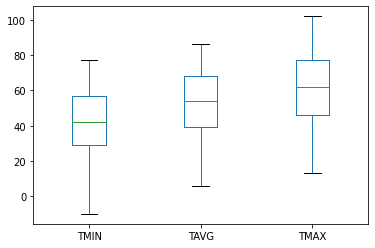

In [11]:
weather[["TMIN","TAVG","TMAX"]].plot(kind="box") 
#Create a box plot to visualize the temperature columns

***

## Plotting the temperature difference

In [12]:
weather["TDIFF"] = weather["TMAX"] - weather["TMIN"]
weather["TDIFF"].describe()

count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64

C:\Users\mkdty\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mkdty\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


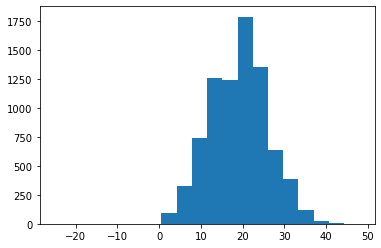

In [13]:
plt.hist(weather["TDIFF"],bins = 20);
#We create a new column in the weather DataFrame named TDIFF 
#that represents the difference between the maximum and minimum temperatures.

***

## Counting bad weather conditions

In [14]:
WT = weather.loc[:,"WT01":"WT22"]
weather["bad_conditions"] = WT.sum(axis="columns")
weather
#We copy the columns WT01 through WT22 from weather to a new DataFrame named WT.
#and calculate the sum of each row in WT, and store the results in a new weather column named bad_conditions.

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF,bad_conditions
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,0.0
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,0.0
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,0.0
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,0.0
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8017,USW00014765,2015-12-27,9.17,51.0,61.0,44.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,1.0
8018,USW00014765,2015-12-28,12.30,40.0,44.0,30.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,0.0
8019,USW00014765,2015-12-29,12.53,33.0,40.0,28.0,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,3.0
8020,USW00014765,2015-12-30,6.93,30.0,35.0,27.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2.0


In [15]:
WT.fillna(0,axis=1).astype(int)
#For every row in the dataset, each WT column contains either a 1 (meaning the condition was present that day) 
#or NaN (meaning the condition was not present).

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8017,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8019,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8020,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


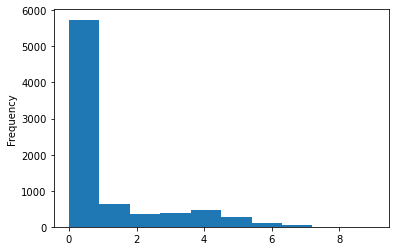

In [16]:
weather["bad_conditions"].plot(kind="hist")

In [17]:
weather["bad_conditions"].value_counts().sort_index

<bound method Series.sort_index of 0.0    5738
1.0     628
4.0     476
3.0     380
2.0     368
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_conditions, dtype: int64>

***

## Rating the weather conditions

In [18]:
weather["bad_conditions"].value_counts().sort_index

<bound method Series.sort_index of 0.0    5738
1.0     628
4.0     476
3.0     380
2.0     368
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_conditions, dtype: int64>

In [19]:
mapp = {0:"good",1:"bad",2:"bad",3:"bad",4:"bad",5:"worse",6:"worse",7:"worse",8:"worse",9:"worse"}
weather["rating"]=weather.bad_conditions.map(mapp)
weather
#Create a dictionary called mapping that maps the bad_conditions integers to strings

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF,bad_conditions,rating
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,0.0,good
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,0.0,good
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,0.0,good
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,0.0,good
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,0.0,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8017,USW00014765,2015-12-27,9.17,51.0,61.0,44.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,1.0,bad
8018,USW00014765,2015-12-28,12.30,40.0,44.0,30.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,0.0,good
8019,USW00014765,2015-12-29,12.53,33.0,40.0,28.0,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,3.0,bad
8020,USW00014765,2015-12-30,6.93,30.0,35.0,27.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2.0,bad


In [20]:
weather["rating"].value_counts()

good     5738
bad      1852
worse     432
Name: rating, dtype: int64

In [21]:
weather["rating"]

0       good
1       good
2       good
3       good
4       good
        ... 
8017     bad
8018    good
8019     bad
8020     bad
8021     bad
Name: rating, Length: 8022, dtype: object

***

## Changing the data type to category

In [22]:
cats = ["good","bad","worse"]
weather["rating"] = weather.rating.astype("category",cats)
weather["rating"].dtype
#Create a list object called cats that lists the weather ratings in a logical order: 'good', 'bad', 'worse'.

CategoricalDtype(categories=['bad', 'good', 'worse'], ordered=False)

In [23]:
cats1 = pd.api.types.CategoricalDtype(categories=cats, ordered=True)
weather["rating"]= weather.rating.astype(cats1)
weather["rating"].dtype

CategoricalDtype(categories=['good', 'bad', 'worse'], ordered=True)

In [24]:
weather["rating"].head()

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]

In [25]:
df.shape

(47058, 25)

***

## Preparing the DataFrames

In [26]:
df.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_datetime,frisk,stop_minutes
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2008-07-28 19:13:00,RI-2008-27978,2008-07-28,19:13,Zone X4,300,M,1971.0,37.0,B,Black,...,False,Citation,False,0-15 Min,True,False,Zone X4,2008-07-28 19:13:00,False,8.0
2008-02-07 20:20:00,RI-2008-05302,2008-02-07,20:20,Zone K3,300,M,1967.0,41.0,W,White,...,False,Citation,False,0-15 Min,False,False,Zone K3,2008-02-07 20:20:00,False,8.0
2008-01-26 19:59:00,RI-2008-03611,2008-01-26,19:59,Zone K3,300,M,1986.0,22.0,W,White,...,False,Citation,False,0-15 Min,True,False,Zone K3,2008-01-26 19:59:00,False,8.0
2014-12-28 17:23:00,RI-2014-50432,2014-12-28,17:23,Zone X4,500,F,1967.0,47.0,W,White,...,False,Citation,False,0-15 Min,True,False,Zone X4,2014-12-28 17:23:00,False,8.0
2008-07-24 15:17:00,RI-2008-27455,2008-07-24,15:17,Zone K2,900,M,1941.0,67.0,W,White,...,False,Citation,False,16-30 Min,False,False,Zone K2,2008-07-24 15:17:00,False,23.0


In [27]:
import numpy as np

In [28]:
df.insert(3,"index",np.arange(0,47058))
df.head()


,id,stop_date,stop_time,index,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_datetime,frisk,stop_minutes
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2008-07-28 19:13:00,RI-2008-27978,2008-07-28,19:13,0,Zone X4,300,M,1971.0,37.0,B,...,False,Citation,False,0-15 Min,True,False,Zone X4,2008-07-28 19:13:00,False,8.0
2008-02-07 20:20:00,RI-2008-05302,2008-02-07,20:20,1,Zone K3,300,M,1967.0,41.0,W,...,False,Citation,False,0-15 Min,False,False,Zone K3,2008-02-07 20:20:00,False,8.0
2008-01-26 19:59:00,RI-2008-03611,2008-01-26,19:59,2,Zone K3,300,M,1986.0,22.0,W,...,False,Citation,False,0-15 Min,True,False,Zone K3,2008-01-26 19:59:00,False,8.0
2014-12-28 17:23:00,RI-2014-50432,2014-12-28,17:23,3,Zone X4,500,F,1967.0,47.0,W,...,False,Citation,False,0-15 Min,True,False,Zone X4,2014-12-28 17:23:00,False,8.0
2008-07-24 15:17:00,RI-2008-27455,2008-07-24,15:17,4,Zone K2,900,M,1941.0,67.0,W,...,False,Citation,False,16-30 Min,False,False,Zone K2,2008-07-24 15:17:00,False,23.0


In [29]:
df.set_index("index",inplace=True)

In [30]:
#df.drop("index",inplace=True,axis=1)

In [31]:
df.shape

(47058, 25)

In [32]:
weather_rating = weather[["DATE","rating"]]
weather_rating.head()
weather_rating

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good
...,...,...
8017,2015-12-27,bad
8018,2015-12-28,good
8019,2015-12-29,bad
8020,2015-12-30,bad


In [33]:
df.head()

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_datetime,frisk,stop_minutes
index,,,,,,,,,,,,,,,,,,,,,
0,RI-2008-27978,2008-07-28,19:13,Zone X4,300,M,1971.0,37.0,B,Black,...,False,Citation,False,0-15 Min,True,False,Zone X4,2008-07-28 19:13:00,False,8.0
1,RI-2008-05302,2008-02-07,20:20,Zone K3,300,M,1967.0,41.0,W,White,...,False,Citation,False,0-15 Min,False,False,Zone K3,2008-02-07 20:20:00,False,8.0
2,RI-2008-03611,2008-01-26,19:59,Zone K3,300,M,1986.0,22.0,W,White,...,False,Citation,False,0-15 Min,True,False,Zone K3,2008-01-26 19:59:00,False,8.0
3,RI-2014-50432,2014-12-28,17:23,Zone X4,500,F,1967.0,47.0,W,White,...,False,Citation,False,0-15 Min,True,False,Zone X4,2014-12-28 17:23:00,False,8.0
4,RI-2008-27455,2008-07-24,15:17,Zone K2,900,M,1941.0,67.0,W,White,...,False,Citation,False,16-30 Min,False,False,Zone K2,2008-07-24 15:17:00,False,23.0


***

## Merging the DataFrames

In [34]:
df_weather = pd.merge(left=df, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')
df_weather.shape

(93991, 27)

In [35]:
#df_weather.rename(columns={"stop_date":"DATE"},inplace= True)

In [36]:
df

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_datetime,frisk,stop_minutes
index,,,,,,,,,,,,,,,,,,,,,
0,RI-2008-27978,2008-07-28,19:13,Zone X4,300,M,1971.0,37.0,B,Black,...,False,Citation,False,0-15 Min,True,False,Zone X4,2008-07-28 19:13:00,False,8.0
1,RI-2008-05302,2008-02-07,20:20,Zone K3,300,M,1967.0,41.0,W,White,...,False,Citation,False,0-15 Min,False,False,Zone K3,2008-02-07 20:20:00,False,8.0
2,RI-2008-03611,2008-01-26,19:59,Zone K3,300,M,1986.0,22.0,W,White,...,False,Citation,False,0-15 Min,True,False,Zone K3,2008-01-26 19:59:00,False,8.0
3,RI-2014-50432,2014-12-28,17:23,Zone X4,500,F,1967.0,47.0,W,White,...,False,Citation,False,0-15 Min,True,False,Zone X4,2014-12-28 17:23:00,False,8.0
4,RI-2008-27455,2008-07-24,15:17,Zone K2,900,M,1941.0,67.0,W,White,...,False,Citation,False,16-30 Min,False,False,Zone K2,2008-07-24 15:17:00,False,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47053,RI-2011-00069,2011-01-01,13:23,Zone X3,200,F,1963.0,48.0,W,White,...,False,Citation,False,0-15 Min,True,False,Zone X3,2011-01-01 13:23:00,False,8.0
47054,RI-2009-15370,2009-04-21,11:02,Zone K3,300,M,1968.0,41.0,W,White,...,False,Citation,False,16-30 Min,True,False,Zone K3,2009-04-21 11:02:00,False,23.0
47055,RI-2008-30467,2008-08-15,15:21,Zone X4,500,M,1935.0,73.0,W,White,...,False,Citation,False,0-15 Min,True,False,Zone X4,2008-08-15 15:21:00,False,8.0


In [37]:
df_weather.head(3)

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,stop_datetime,frisk,stop_minutes,DATE,rating
0,RI-2008-27978,2008-07-28,19:13,Zone X4,300,M,1971.0,37.0,B,Black,...,False,0-15 Min,True,False,Zone X4,2008-07-28 19:13:00,False,8.0,2008-07-28,good
1,RI-2008-27978,2008-07-28,19:13,Zone X4,300,M,1971.0,37.0,B,Black,...,False,0-15 Min,True,False,Zone X4,2008-07-28 19:13:00,False,8.0,2008-07-28,bad
2,RI-2008-05302,2008-02-07,20:20,Zone K3,300,M,1967.0,41.0,W,White,...,False,0-15 Min,False,False,Zone K3,2008-02-07 20:20:00,False,8.0,2008-02-07,good


In [38]:
weather_rating

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good
...,...,...
8017,2015-12-27,bad
8018,2015-12-28,good
8019,2015-12-29,bad
8020,2015-12-30,bad


In [39]:
df_weather.set_index("stop_datetime",inplace = True)

In [40]:
df_weather.head(3)

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk,stop_minutes,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2008-07-28 19:13:00,RI-2008-27978,2008-07-28,19:13,Zone X4,300,M,1971.0,37.0,B,Black,...,Citation,False,0-15 Min,True,False,Zone X4,False,8.0,2008-07-28,good
2008-07-28 19:13:00,RI-2008-27978,2008-07-28,19:13,Zone X4,300,M,1971.0,37.0,B,Black,...,Citation,False,0-15 Min,True,False,Zone X4,False,8.0,2008-07-28,bad
2008-02-07 20:20:00,RI-2008-05302,2008-02-07,20:20,Zone K3,300,M,1967.0,41.0,W,White,...,Citation,False,0-15 Min,False,False,Zone K3,False,8.0,2008-02-07,good


In [41]:
df_weather.isnull().sum()

id                        0
stop_date                 0
stop_time                 0
location_raw              0
police_department         0
driver_gender             0
driver_age_raw            2
driver_age              346
driver_race_raw           0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type_raw       90363
search_type           90363
contraband_found          0
stop_outcome              0
is_arrested               0
stop_duration             0
out_of_state            172
drugs_related_stop        0
district                  0
frisk                     0
stop_minutes              2
DATE                      0
rating                    0
dtype: int64

***

## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Find out below!

- **First**, you'll calculate the **overall arrest rate**.

- **Then**, you'll calculate the **arrest rate** for each of the **weather ratings** you previously assigned.

- **Finally**, you'll add **violation type** as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, ``good < bad < worse``, they will be sorted that way in the results.

In [42]:
df_weather.is_arrested.mean() # overall arrest rate.

0.03497143343511613

In [43]:
df_weather.groupby("rating")[["is_arrested"]].mean()

,is_arrested
rating,
good,0.034181
bad,0.036657
worse,0.039263


In [44]:
df_weather.groupby(["violation_raw","rating"])[["is_arrested"]].mean()

is_arrested
violation_raw                    rating             
APB                              good       0.300000
                                 bad        0.111111
                                 worse           NaN
Call for Service                 good       0.178958
                                 bad        0.206997
                                 worse      0.142857
Equipment/Inspection Violation   good       0.056069
                                 bad        0.056523
                                 worse      0.097500
Motorist Assist/Courtesy         good       0.092105
                                 bad        0.047619
                                 worse      0.166667
Other Traffic Violation          good       0.060324
                                 bad        0.064787
                                 worse      0.068966
Registration Violation           good       0.085152
                                 bad        0.104762
                                 worse      0.100000
Seatbelt Violation               good       0.027027
                                 bad        0.024194
                                 worse      0.000000
Special Detail/Directed Patrol   good       0.009057
                                 bad        0.013356
                                 worse      0.003937
Speeding                         good       0.013555
                                 bad        0.014020
                                 worse      0.015176
Suspicious Person                good       0.083333
                                 bad        0.166667
                                 worse      0.000000
Violation of City/Town Ordinance good       0.058140
                                 bad        0.078431
                                 worse      0.000000
Warrant                          good       0.727273
                                 bad        0.666667
                                 worse      1.000000

***

## Selecting From a mult-indexed Series

The output of a single ``.groupby()`` operation on multiple columns is a ``Series`` with a ``MultiIndex``. Working with this type of object is similar to working with a ``DataFrame``:

The ``outer`` index level is like the ``DataFrame`` rows.
The ``inner`` index level is like the ``DataFrame`` columns.
In this exercise, you'll practice accessing data from a multi-indexed ``Series`` using the ``.loc[]`` accessor.

**INSTRUCTIONS**

- Save the output of the ``.groupby()`` operation from the last exercise as a new object, ``arrest_rate``.
- Print the ``arrest_rate`` ``Series`` and examine it.
- Print the arrest rate for ``moving violations`` in bad weather.
- Print the arrest rates for ``speeding violations`` in all three weather conditions.

In [45]:
arrest_rate = df_weather.groupby(["violation","rating"])[["is_arrested"]].mean()

In [46]:
arrest_rate.loc['Moving violation'].loc["bad"]

is_arrested    0.064787
Name: bad, dtype: float64

In [47]:
df_weather.violation.unique() # arrest rate for moving violations in bad weather.

array(['Moving violation', 'Speeding', 'Other', 'Registration/plates',
       'Equipment', 'Seat belt'], dtype=object)

***

## Reshaping the arrest rate data

In [48]:
arrest_rate

is_arrested
violation           rating             
Equipment           good       0.056069
                    bad        0.056523
                    worse      0.097500
Moving violation    good       0.060324
                    bad        0.064787
                    worse      0.068966
Other               good       0.077957
                    bad        0.086835
                    worse      0.043836
Registration/plates good       0.085152
                    bad        0.104762
                    worse      0.100000
Seat belt           good       0.027027
                    bad        0.024194
                    worse      0.000000
Speeding            good       0.013555
                    bad        0.014020
                    worse      0.015176

In [49]:
arrest_rate.unstack()

is_arrested                    
rating                     good       bad     worse
violation                                          
Equipment              0.056069  0.056523  0.097500
Moving violation       0.060324  0.064787  0.068966
Other                  0.077957  0.086835  0.043836
Registration/plates    0.085152  0.104762  0.100000
Seat belt              0.027027  0.024194  0.000000
Speeding               0.013555  0.014020  0.015176

In [50]:
df_weather.pivot_table(index="violation",columns = "rating",values = "is_arrested")

rating,good,bad,worse
violation,,,
Equipment,0.056069,0.056523,0.097500
Moving violation,0.060324,0.064787,0.068966
Other,0.077957,0.086835,0.043836
Registration/plates,0.085152,0.104762,0.100000
Seat belt,0.027027,0.024194,0.000000
Speeding,0.013555,0.014020,0.015176
